In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-success-factors-and-insights/StudentPerformanceFactors.csv


# 📘 About Dataset

This dataset contains information about **6,590 students** and the factors that may affect their academic performance. It includes variables such as study habits, attendance, parental involvement, access to resources, extracurricular activities, sleep hours, motivation, and socio-economic background. Academic results are measured through **previous and final exam scores**.

---

## 🔑 Key Features

- **Hours_Studied**: Number of hours a student studies per day (int)  
- **Attendance**: Attendance percentage (int)  
- **Parental_Involvement**: Level of involvement from parents (categorical)  
- **Access_to_Resources**: Availability of study resources (categorical)  
- **Extracurricular_Activities**: Participation in extracurricular activities (categorical)  
- **Sleep_Hours**: Sleep hours per day (int)  
- **Previous_Scores**: Previous academic assessments (int)  
- **Motivation_Level**: Student motivation (categorical)  
- **Family_Income**: Income of father or family (categorical)  
- **Teacher_Quality**: Quality of teachers (categorical)  
- **School_Type**: Type of school attended (categorical)  
- **Peer_Influence**: Influence of peers (categorical)  
- **Physical_Activity**: Physical exercise or activity (int)  
- **Learning_Disabilities**: Whether the student has any learning disabilities (categorical)  
- **Parental_Education_Level**: Highest education level of parents (categorical)  
- **Distance_from_Home**: Distance between home and school (categorical)  
- **Gender**: Student’s gender (categorical)  
- **Exam_Score**: Final exam score (int)


In [2]:
df = pd.read_csv("/kaggle/input/student-success-factors-and-insights/StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [3]:
# LETS UNDERSTAND ABOUT DATASET
print(f"shape of dataset is {df.shape}")
print("\n ======================================================================\n")
print(f"columns present in the dataset are {df.columns}")
print("\n ======================================================================\n")
print(f"columns present in the dataset with there datatypes\n {df.dtypes}")
print("\n ======================================================================\n")
print(f"information about dataset \n {df.info()}")
print("\n ======================================================================\n")
print(f"data discritbtion of every numerical feature \n{df.describe()}")
print("\n ======================================================================\n")
print(f"data describtion of non numerical datatype \n {df.describe(include=['float64','int64'])}")
print("\n ======================================================================\n")
print(f"numercial columns in dataset are {df.select_dtypes(include = ['float','int']).columns.to_list()}")
print("\n ======================================================================\n")
print(f"non numerical columns in dataset are {df.select_dtypes(include = 'O').columns.to_list()}")

shape of dataset is (6607, 20)


columns present in the dataset are Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


columns present in the dataset with there datatypes
 Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher

In [4]:
# AS WE OBSERVE THAT EVERY OBJECT COLUMN IS CATEGORICAL COLUMN 
# LETS UNDERDTAND THE VALUE DISTRIBUTION FOR EACH COLUMN 
num = []
cat = []
for col in df.columns:
    print("\n"+"="*100+"\n")
    print(f"categores and values distribution for { col } {df[col].value_counts()}")
    if (df[col].nunique())>10 :
        num.append(col)
    else:
        cat.append(col)

# lets print the columns 
print("\n"+"="*100+"\n")
print(f"categorical columns are {cat}")
print("\n"+"="*100+"\n")
print(f"numerial columns are {num}")





categores and values distribution for Hours_Studied Hours_Studied
20    465
19    441
21    431
23    411
22    402
18    401
17    381
24    357
16    351
15    315
25    289
14    269
26    263
27    229
13    218
12    192
28    171
11    146
29    134
30    123
10     94
9      86
31     77
8      58
32     54
7      51
33     40
34     29
5      21
35     20
4      17
6      17
3      12
36     11
38      7
39      7
2       6
37      6
1       3
43      1
44      1
Name: count, dtype: int64


categores and values distribution for Attendance Attendance
67     190
98     187
76     185
77     184
64     182
94     180
91     175
84     175
79     175
82     173
69     170
68     170
80     169
96     168
73     168
81     168
93     167
72     167
74     165
78     165
61     164
95     163
71     162
89     162
97     161
70     161
65     158
83     157
90     156
63     155
88     155
92     154
99     154
62     152
87     151
86     151
75     149
85     146
66     145
60   

In [5]:
# LETS CHECK THE NULL VALUES AND DUPLICATE IN DATASET 
print(df.isna().sum())
print("Percenatge of null values are ")
print(df.isna().mean()*100)


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Percenatge of null values are 
Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level       

In [6]:
# here null values are less then 2 percenatge so it does not affect our perdiction so lets drop them 
# Drop rows with any null values
df = df.dropna()

# Verify if all null values are removed
df.isnull().sum()


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### 📊 Dataset Observations

- **Shape of dataset:** 6607 rows × 20 columns.  
- **Numerical columns:** 'Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score'.  
- **Categorical columns:** 16 object-type columns including 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', etc.  
- **Null values:** Very few (<2%) in 'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home', safely dropped.    
- **Feature insights:**  
  - Most categorical features have 2–3 unique levels (e.g., 'Gender', 'School_Type').  
  - Some numerical features like 'Hours_Studied' and 'Previous_Scores' have wide ranges.  
- **General observation:** Dataset is clean, with minimal preprocessing required. Categorical features dominate, so encoding is necessary before modeling.


## visulization

In [7]:
import matplotlib.pyplot  as plt
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


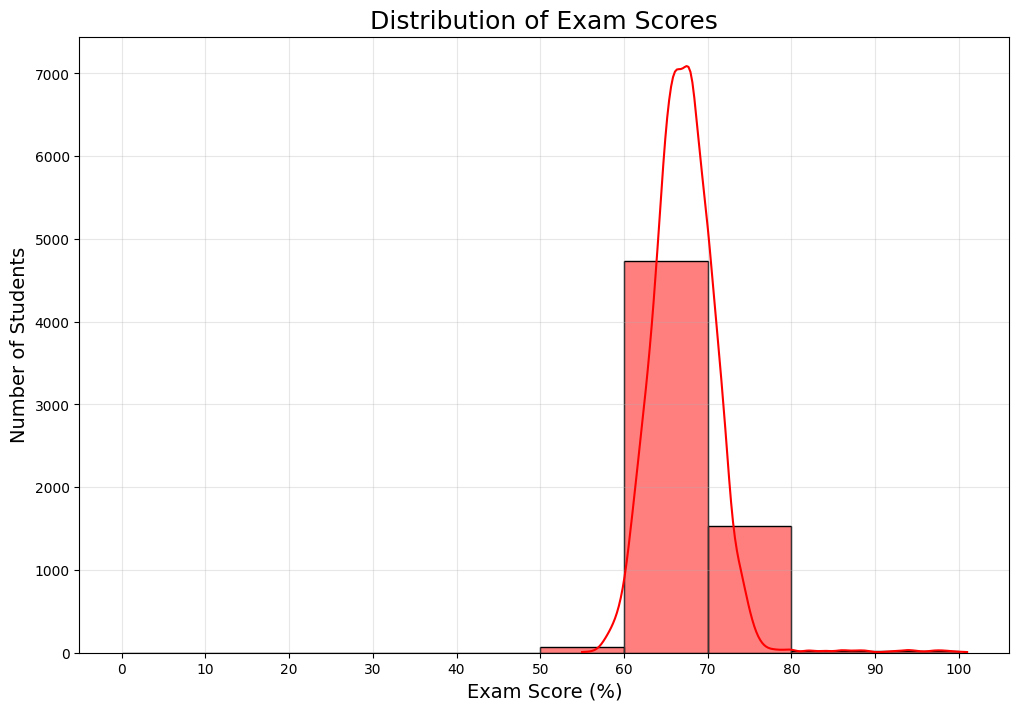

In [8]:
# FIRST LETS PLOT OUR TARGET VARIABLE
plt.figure(figsize=(12,8))
sns.histplot(x="Exam_Score", data=df, kde=True, color="red", edgecolor="black", bins=np.linspace(0,100,11))
plt.title("Distribution of Exam Scores", fontsize=18)
plt.xlabel("Exam Score (%)", fontsize=14)
plt.ylabel("Number of Students", fontsize=14)
plt.xticks(np.linspace(0,100,11))
plt.grid(alpha=0.3)
plt.show()

- **Target variable (Exam_Score):**  
  - Approximately **normal distribution** with slight left skew.  
  - Majority of scores between **65–70 marks**.  
  - Few outliers above 90 and below 60.

distribution of values iin Parental_Involvement are 
   Parental_Involvement  count
0               Medium   3251
1                 High   1836
2                  Low   1291


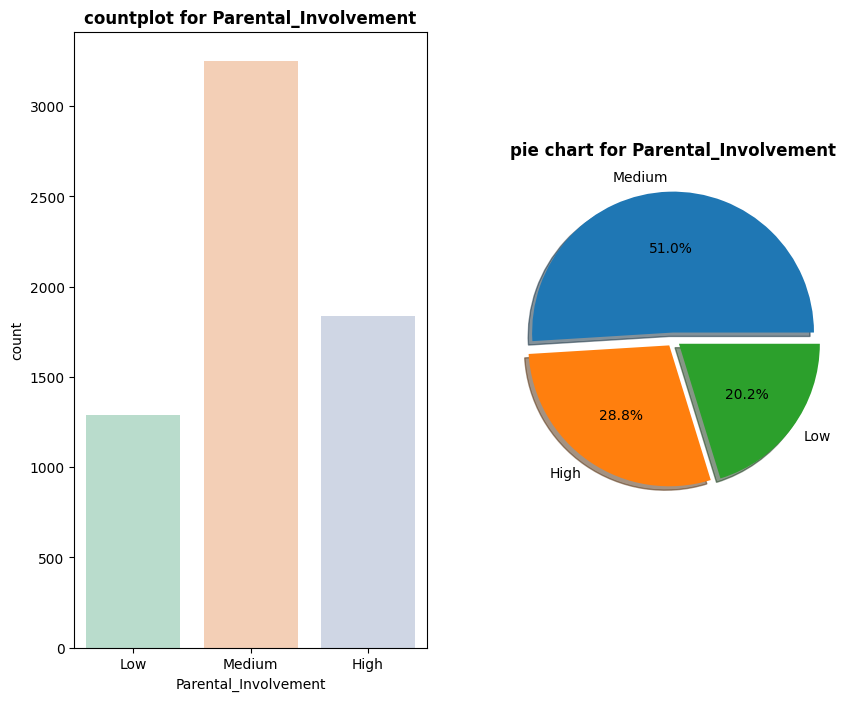

distribution of values iin Access_to_Resources are 
   Access_to_Resources  count
0              Medium   3204
1                High   1900
2                 Low   1274


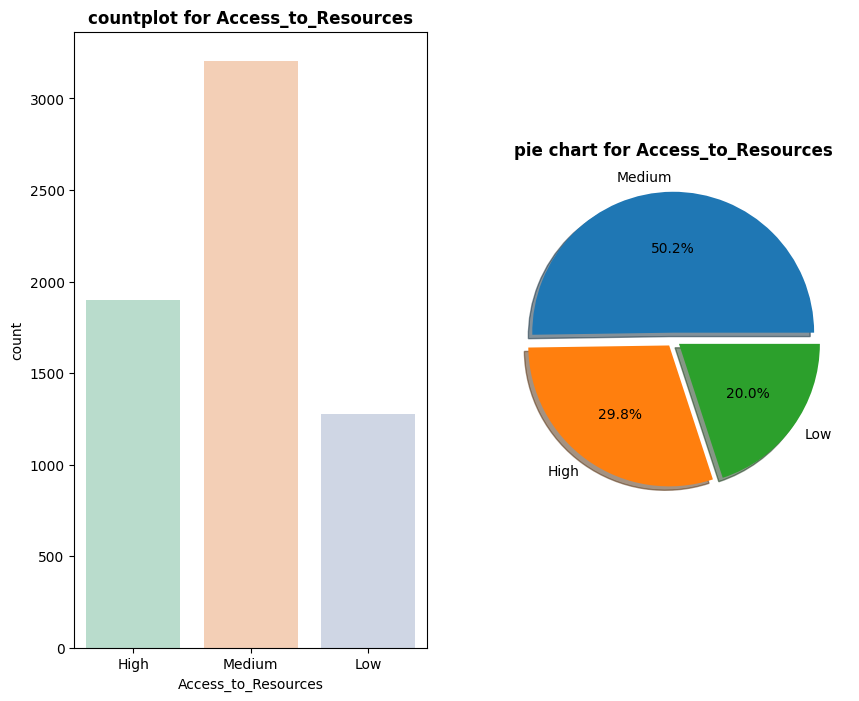

distribution of values iin Extracurricular_Activities are 
   Extracurricular_Activities  count
0                        Yes   3807
1                         No   2571


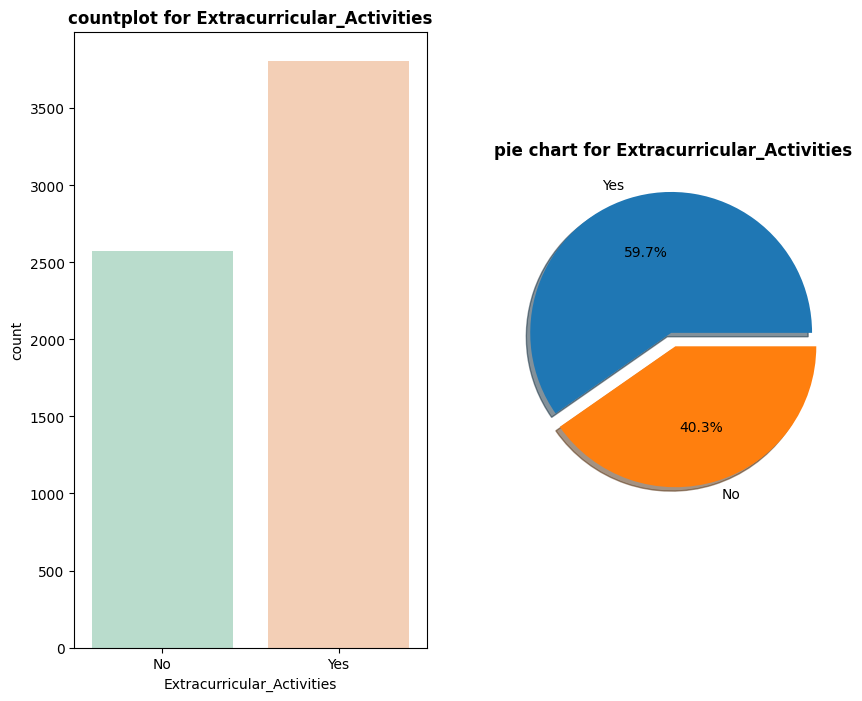

distribution of values iin Sleep_Hours are 
    Sleep_Hours  count
0            7   1682
1            8   1354
2            6   1322
3            9    753
4            5    668
5           10    303
6            4    296


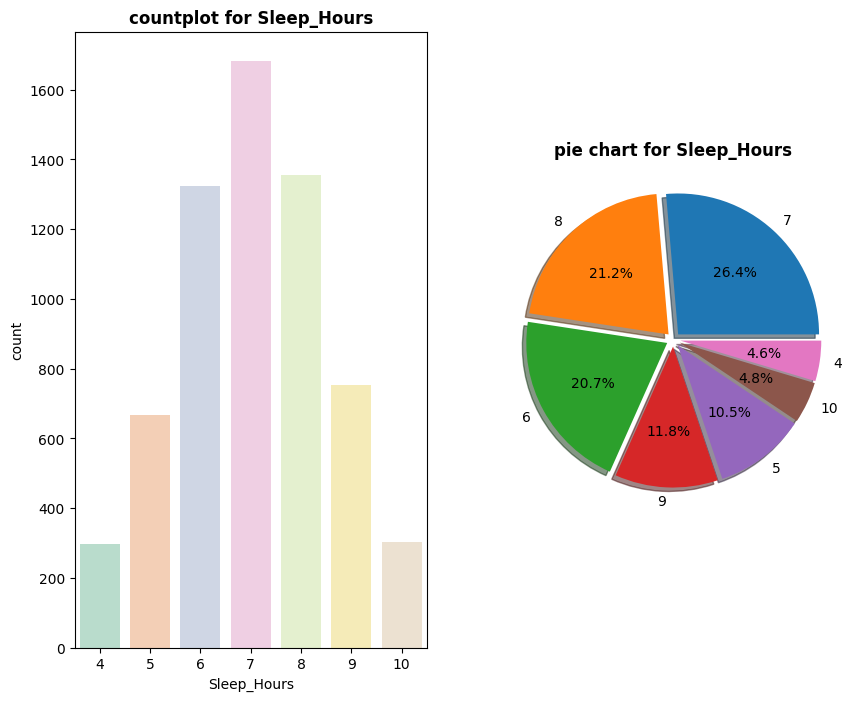

distribution of values iin Motivation_Level are 
   Motivation_Level  count
0           Medium   3237
1              Low   1864
2             High   1277


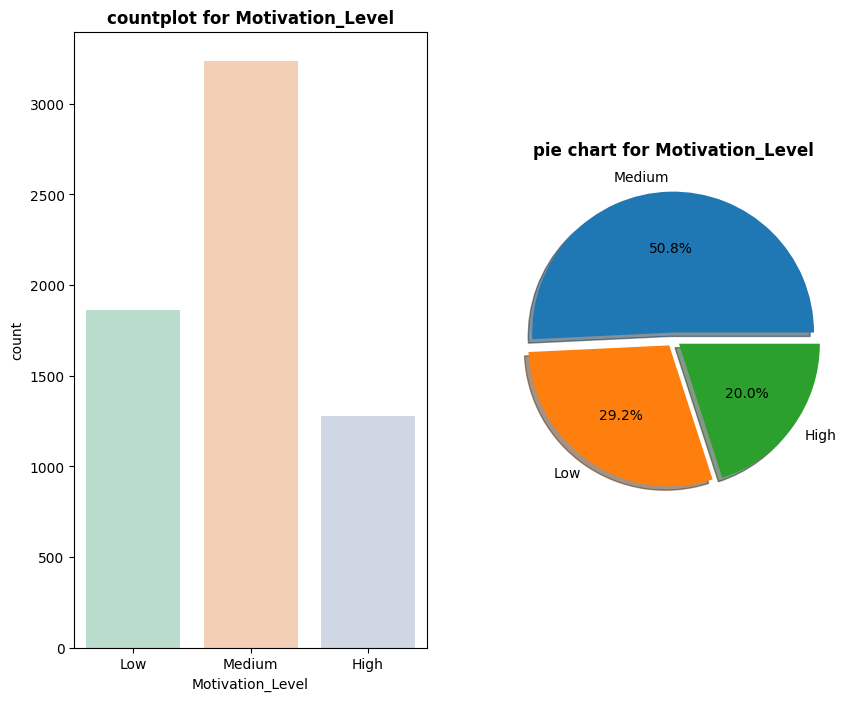

distribution of values iin Internet_Access are 
   Internet_Access  count
0             Yes   5893
1              No    485


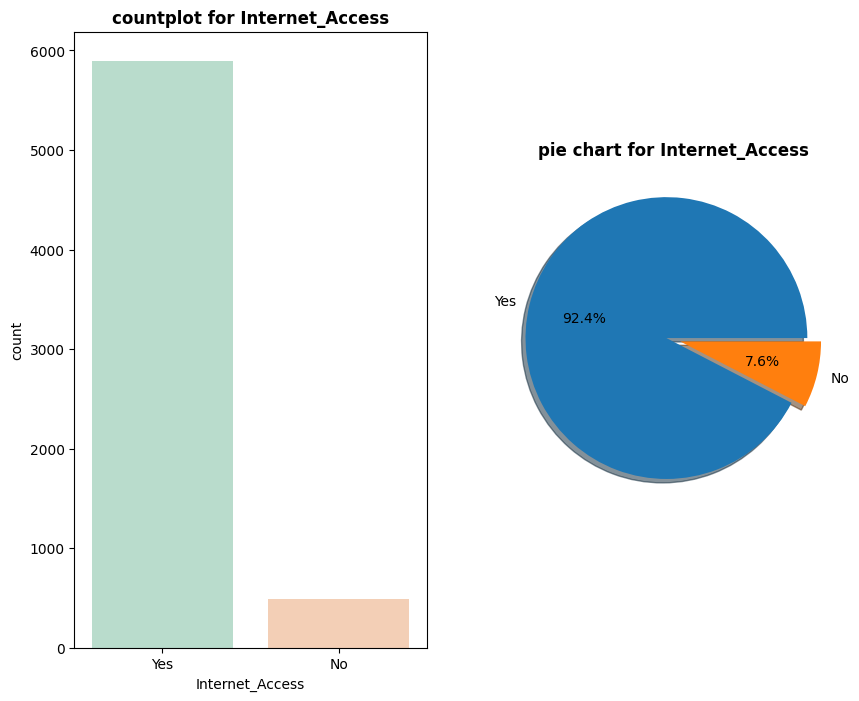

distribution of values iin Tutoring_Sessions are 
    Tutoring_Sessions  count
0                  1   2111
1                  2   1586
2                  0   1458
3                  3    800
4                  4    296
5                  5    101
6                  6     18
7                  7      7
8                  8      1


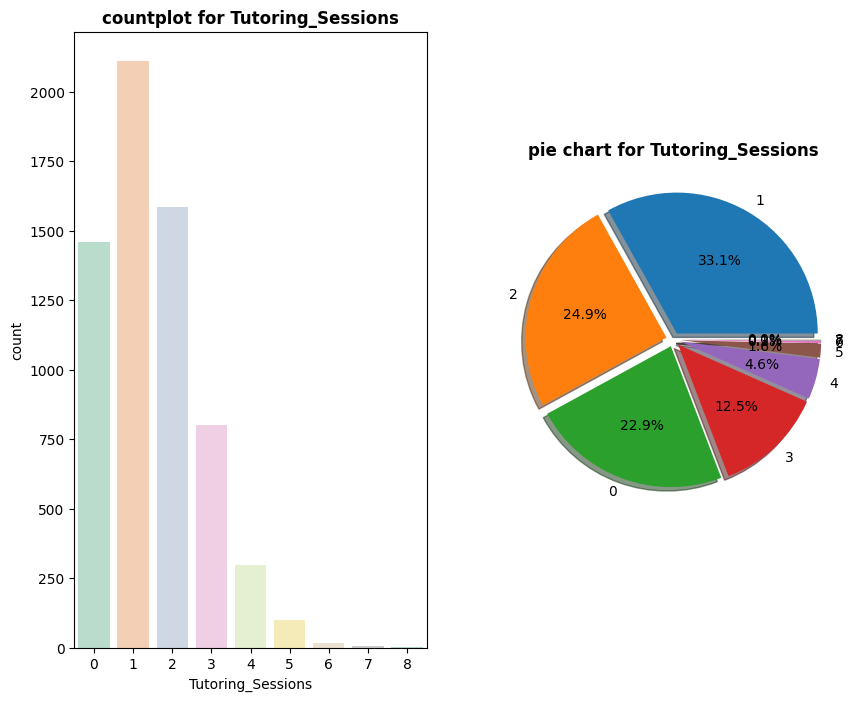

distribution of values iin Family_Income are 
   Family_Income  count
0           Low   2582
1        Medium   2566
2          High   1230


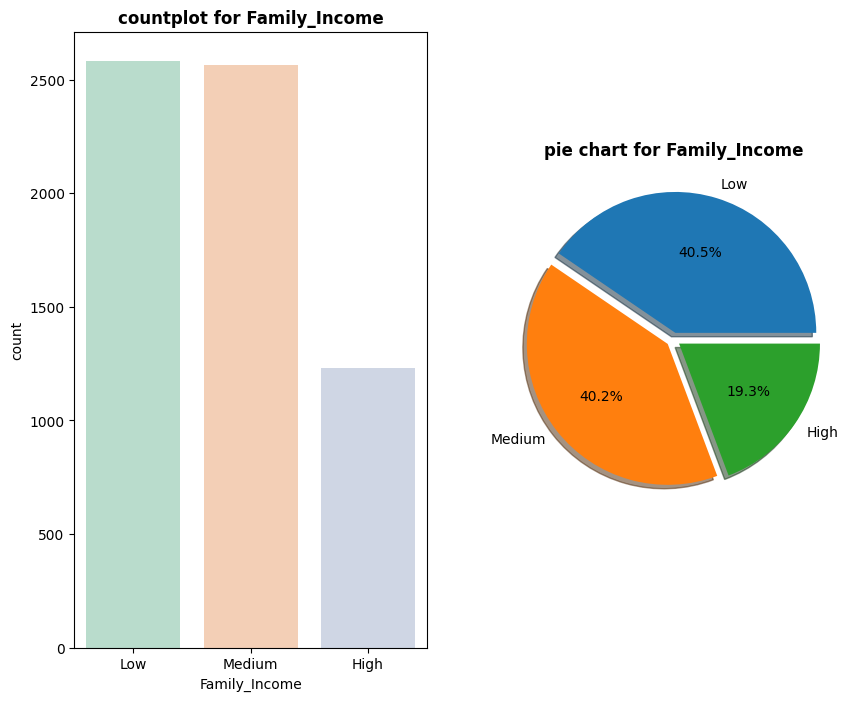

distribution of values iin Teacher_Quality are 
   Teacher_Quality  count
0          Medium   3826
1            High   1905
2             Low    647


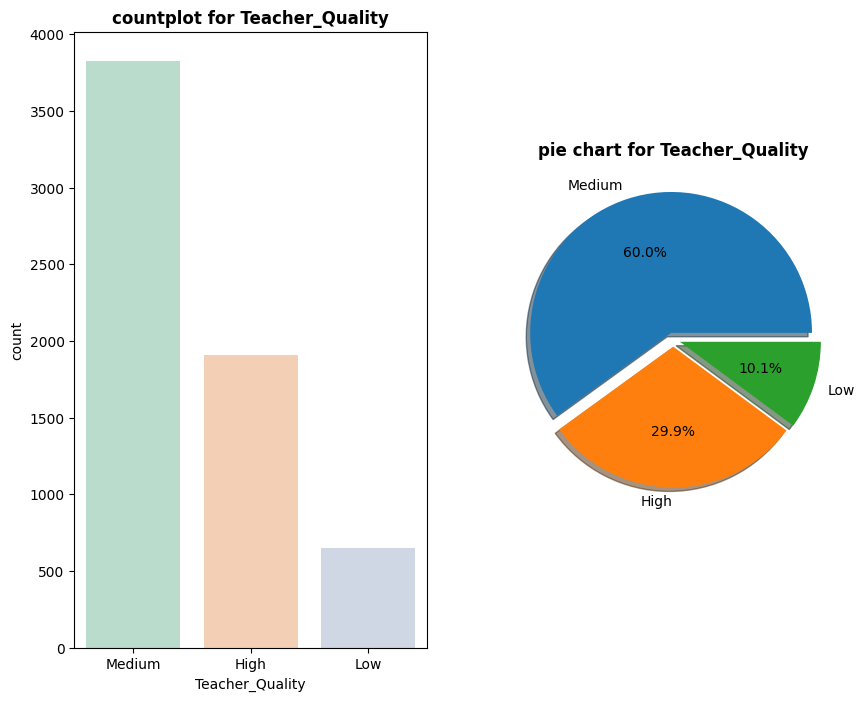

distribution of values iin School_Type are 
   School_Type  count
0      Public   4434
1     Private   1944


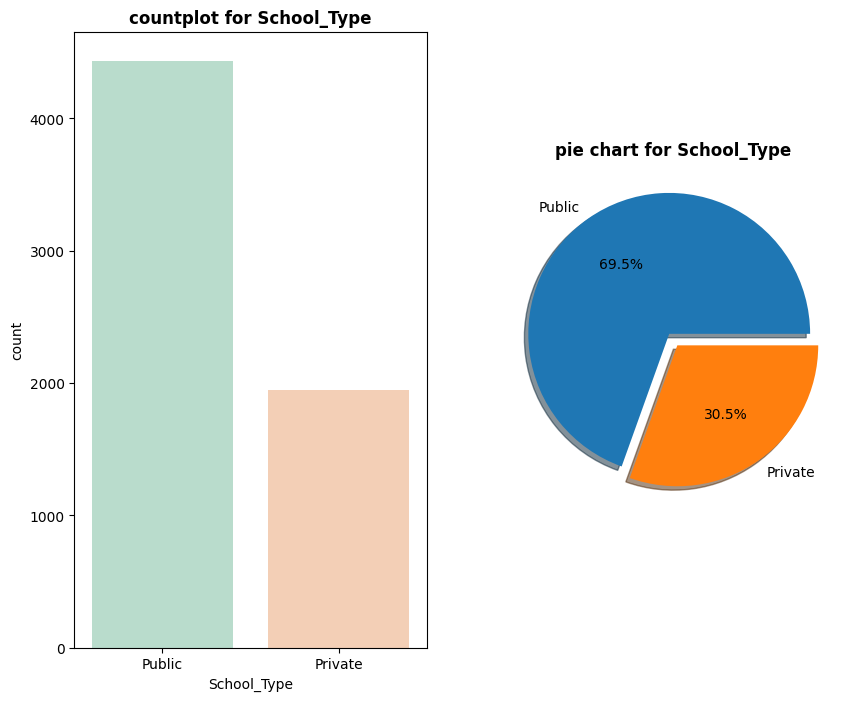

distribution of values iin Peer_Influence are 
   Peer_Influence  count
0       Positive   2553
1        Neutral   2495
2       Negative   1330


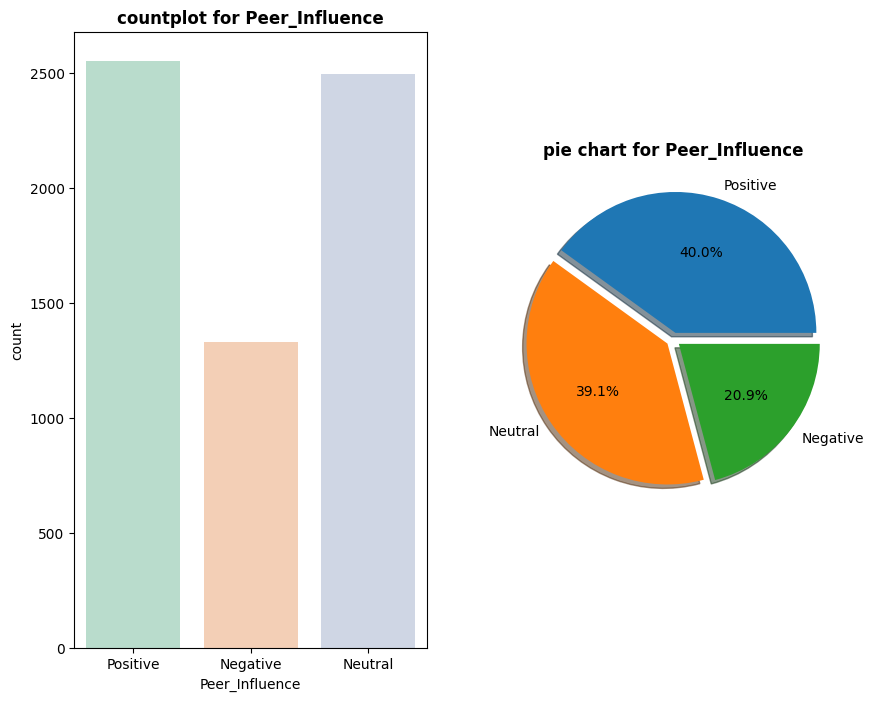

distribution of values iin Physical_Activity are 
    Physical_Activity  count
0                  3   2460
1                  2   1562
2                  4   1535
3                  1    400
4                  5    346
5                  0     44
6                  6     31


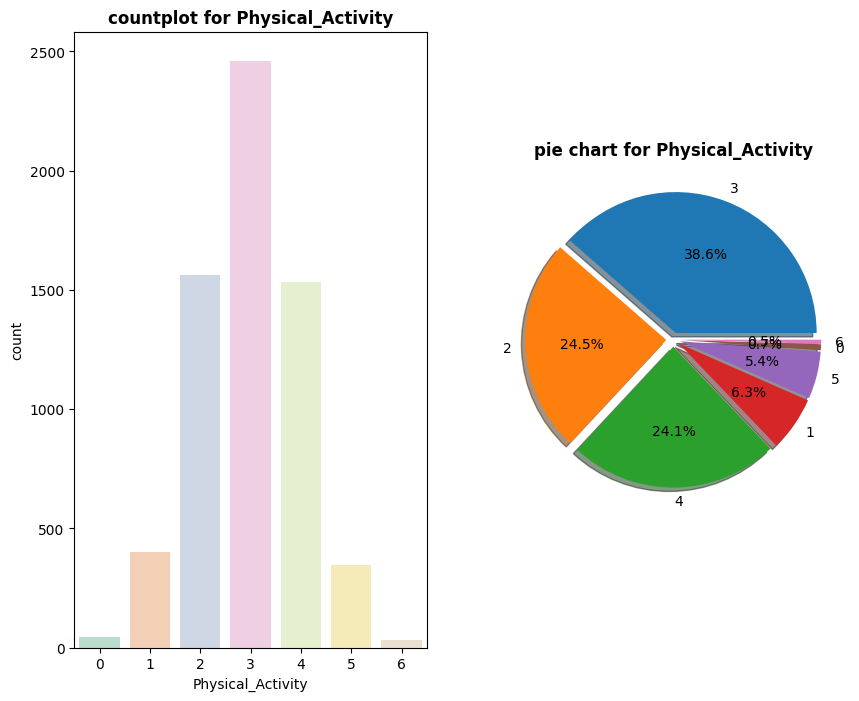

distribution of values iin Learning_Disabilities are 
   Learning_Disabilities  count
0                    No   5710
1                   Yes    668


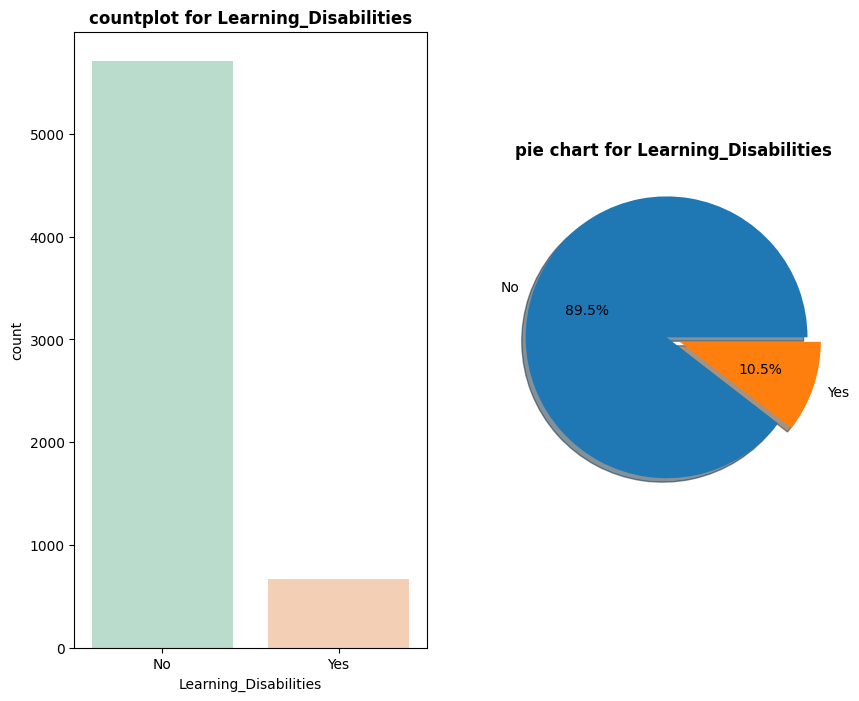

distribution of values iin Parental_Education_Level are 
   Parental_Education_Level  count
0              High School   3159
1                  College   1939
2             Postgraduate   1280


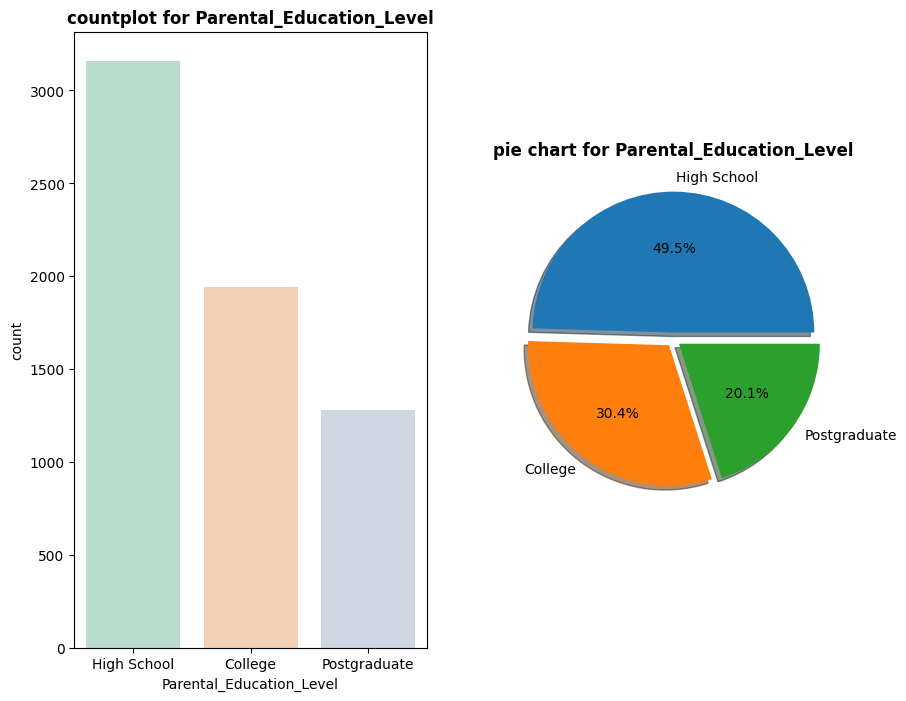

distribution of values iin Distance_from_Home are 
   Distance_from_Home  count
0               Near   3801
1           Moderate   1941
2                Far    636


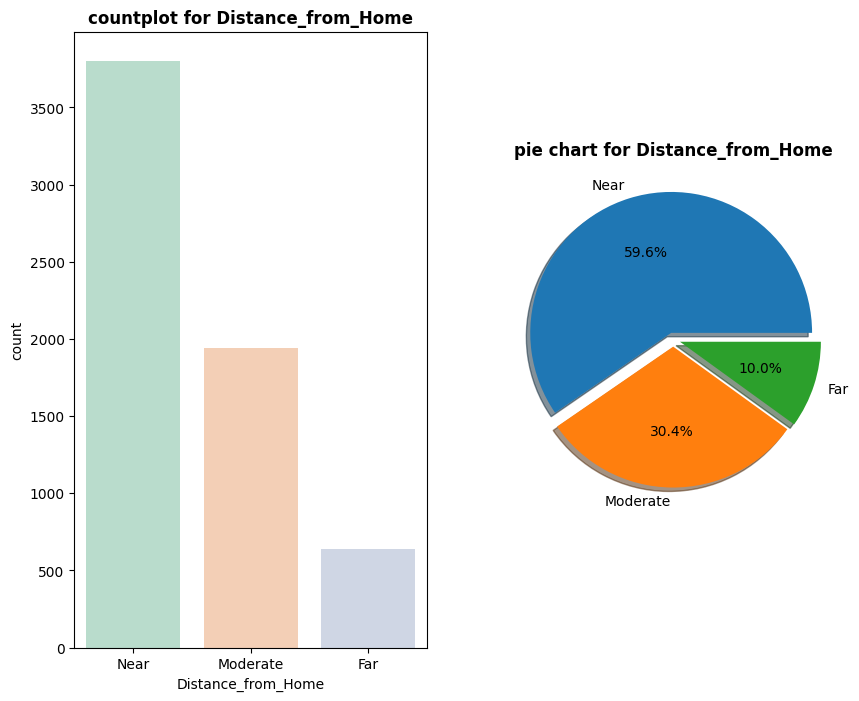

distribution of values iin Gender are 
    Gender  count
0    Male   3688
1  Female   2690


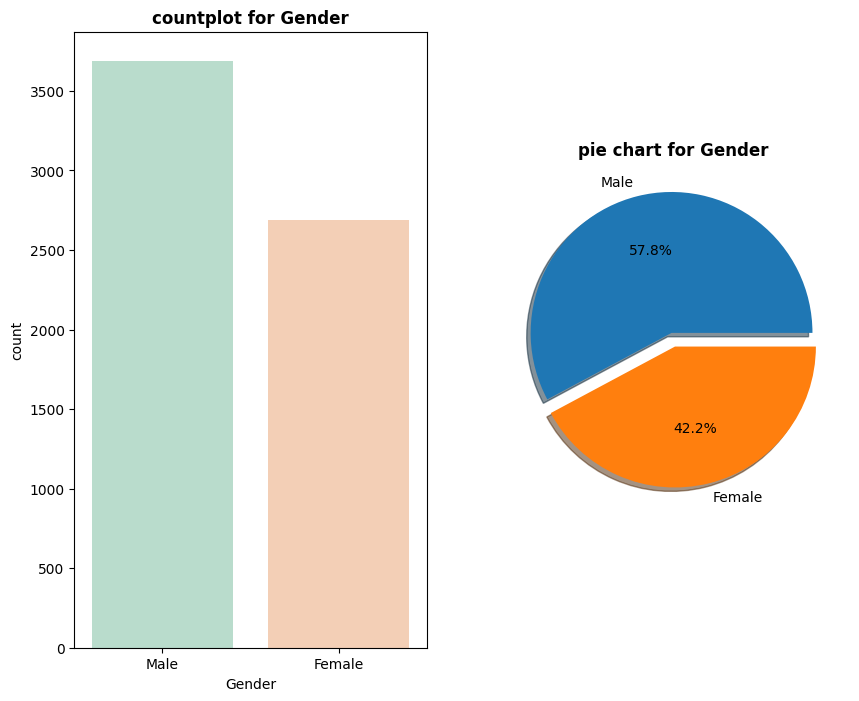

In [9]:
# lets understand the distribution of categorical feature
for col in cat:
    print(f"distribution of values iin {col} are \n {df[col].value_counts().reset_index()}")
    fig ,ax = plt.subplots(1,2,figsize = (10,8))
    
    sns.countplot(x = col,data = df ,palette = "Pastel2",ax = ax[0])
    ax[1].pie(df[col].value_counts(),labels = df[col].value_counts().index,autopct='%1.1f%%', explode=[0.05]*len(df[col].value_counts()), shadow=True)
    
    ax[0].set_title(f"countplot for {col}",fontweight = "bold")
    ax[1].set_title(f"pie chart for {col}",fontweight = "bold")
    
    
    plt.show()

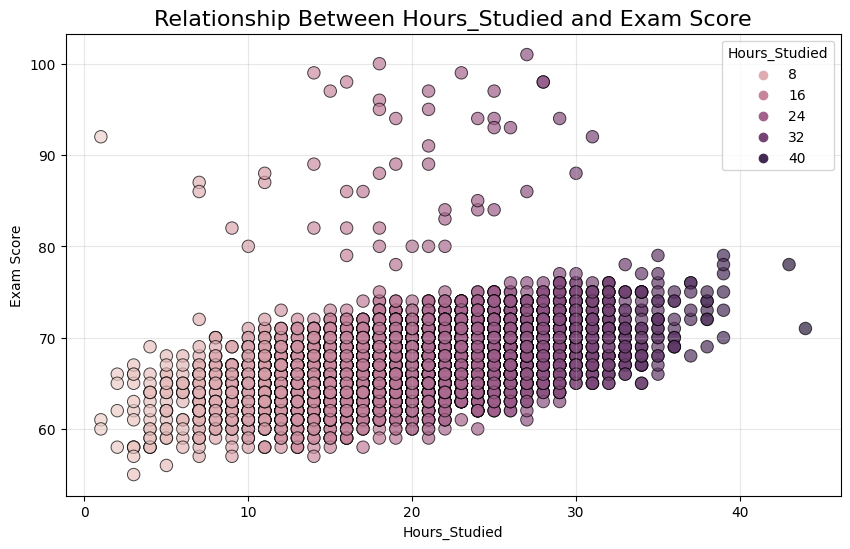

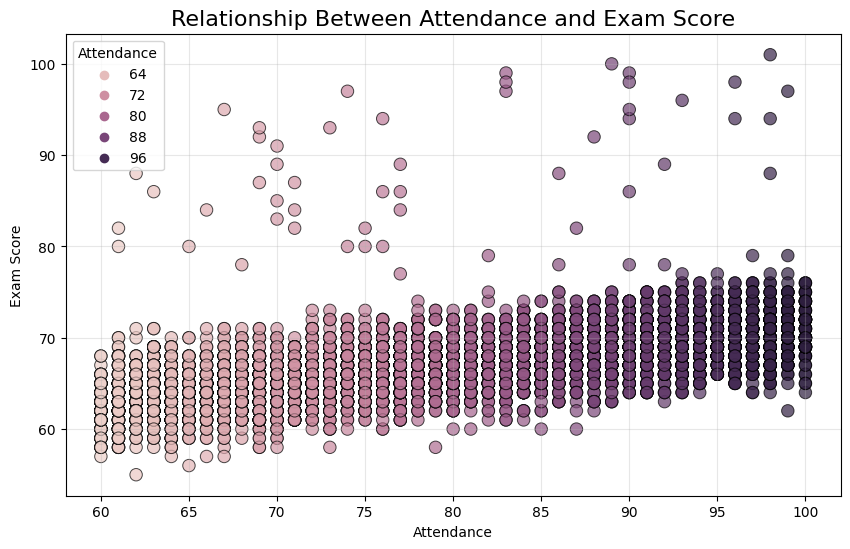

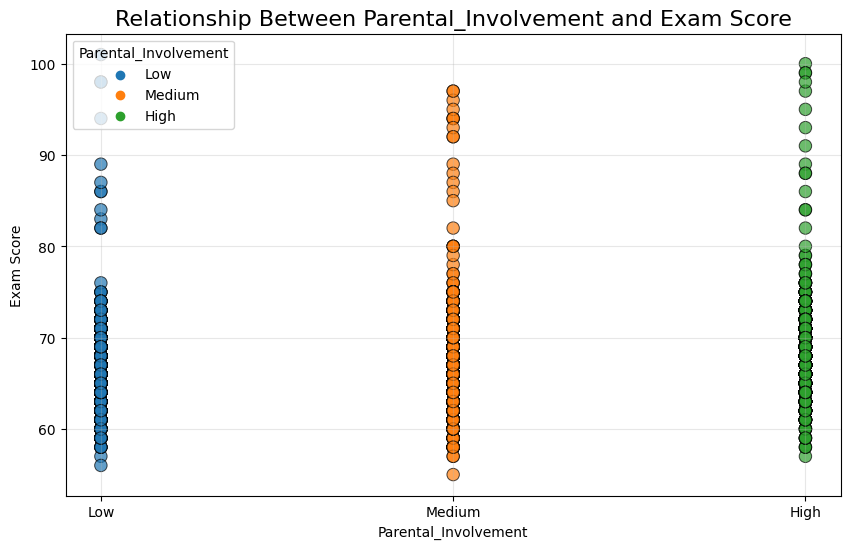

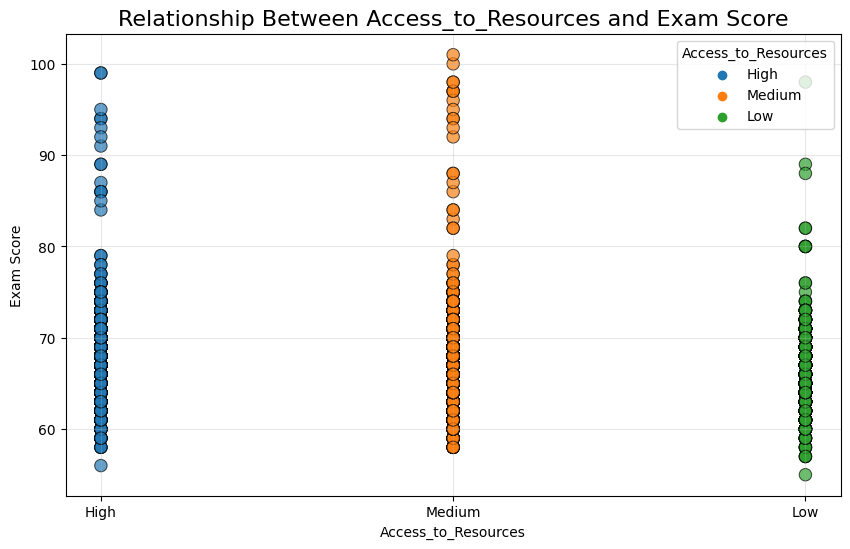

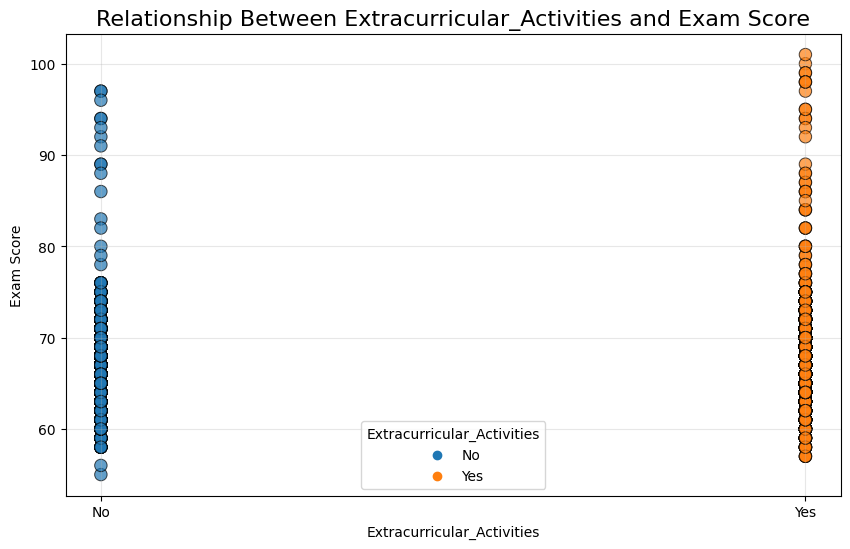

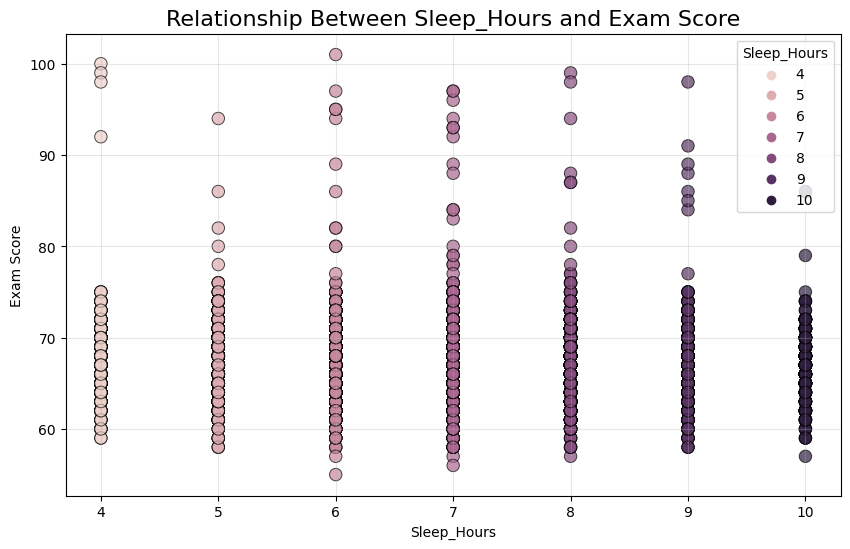

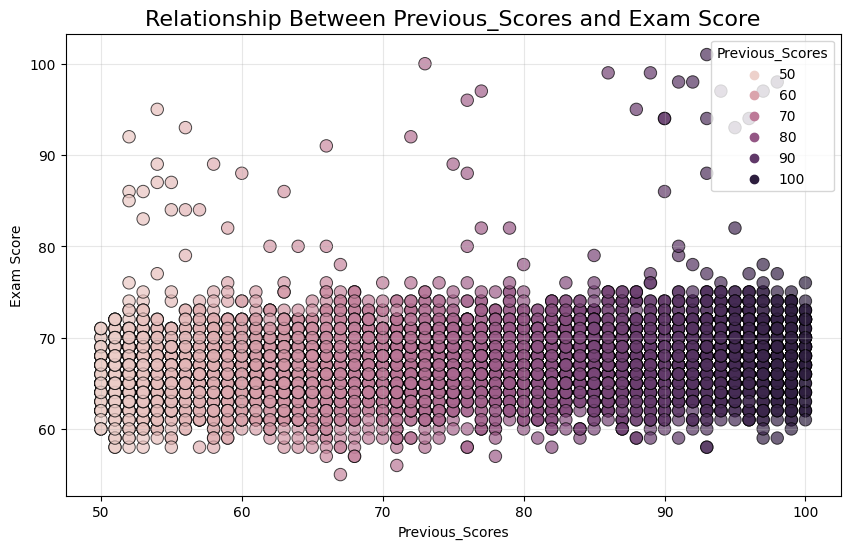

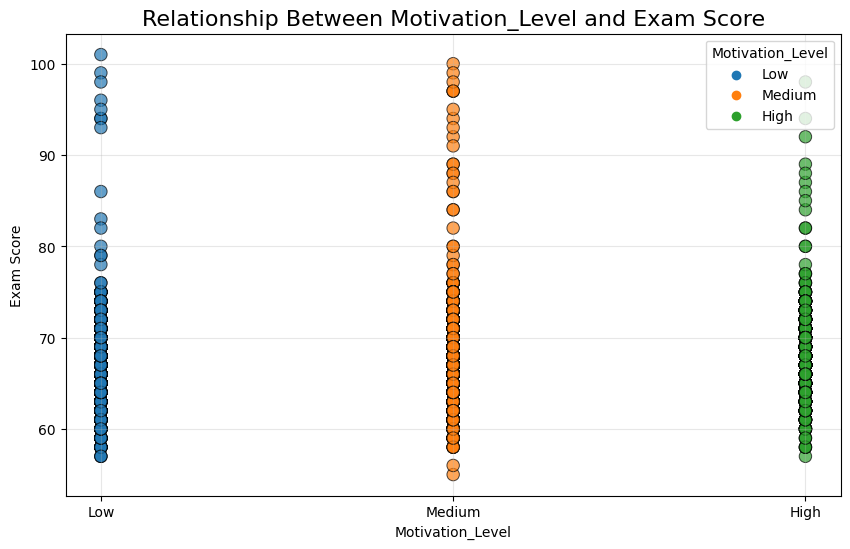

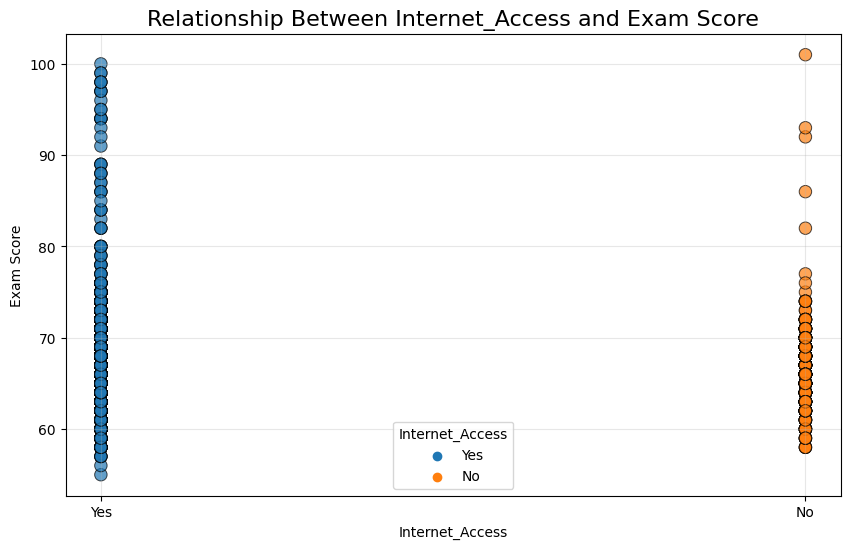

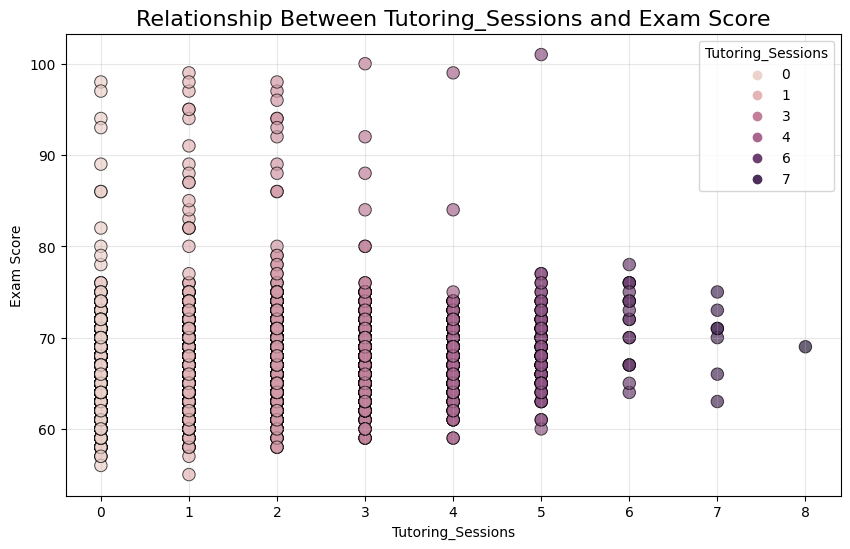

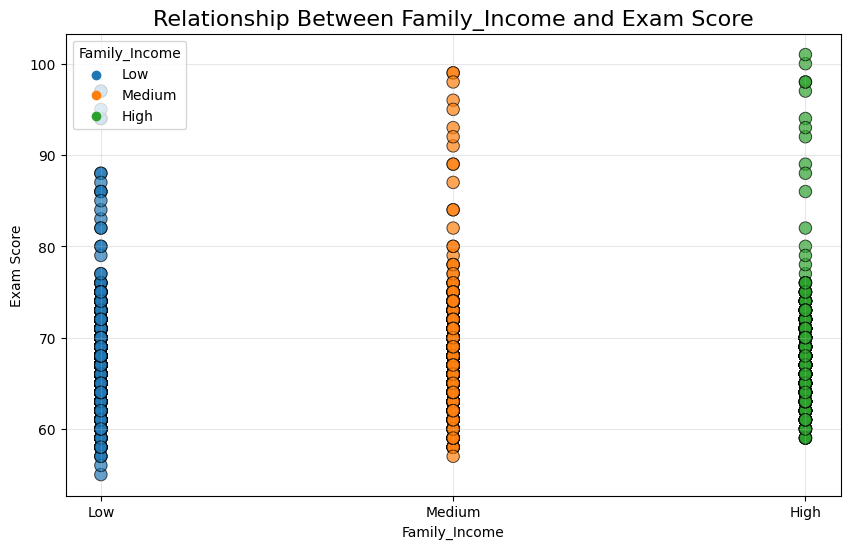

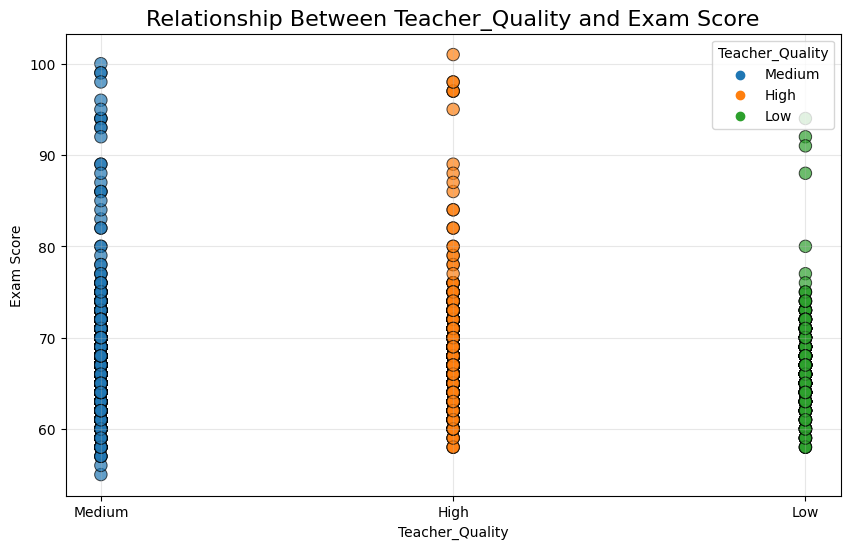

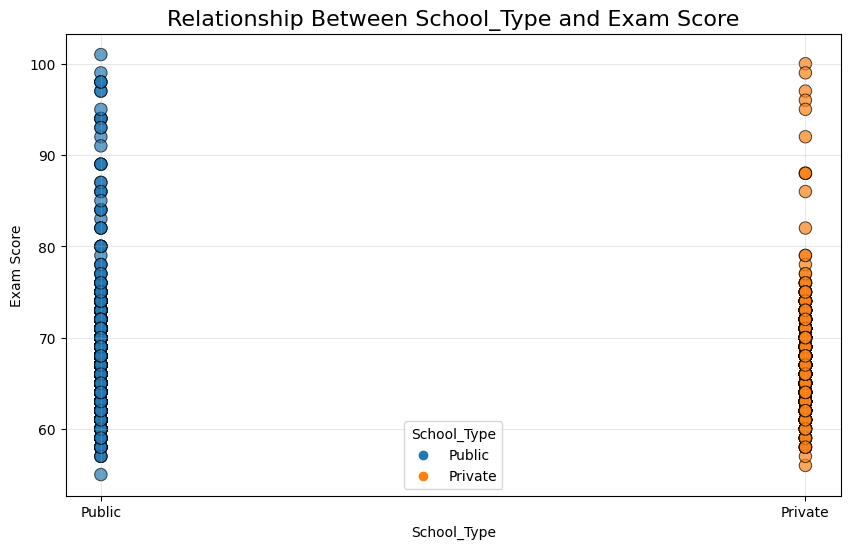

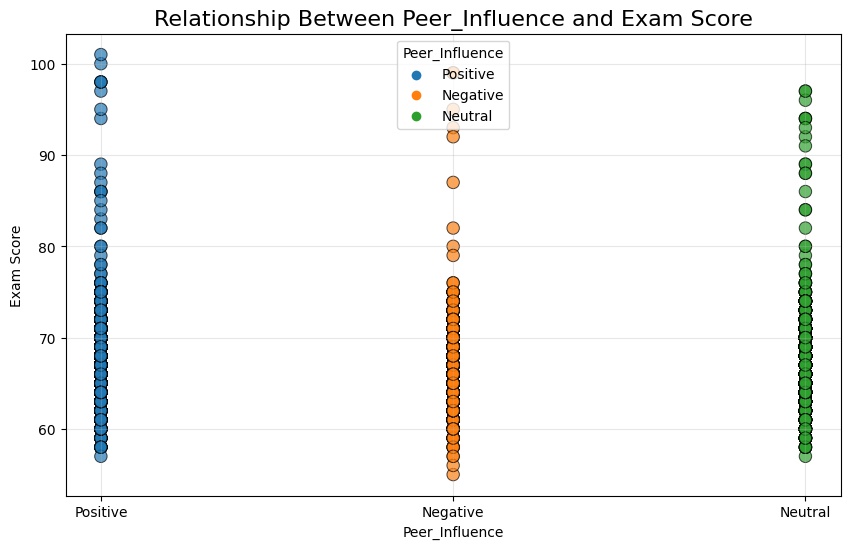

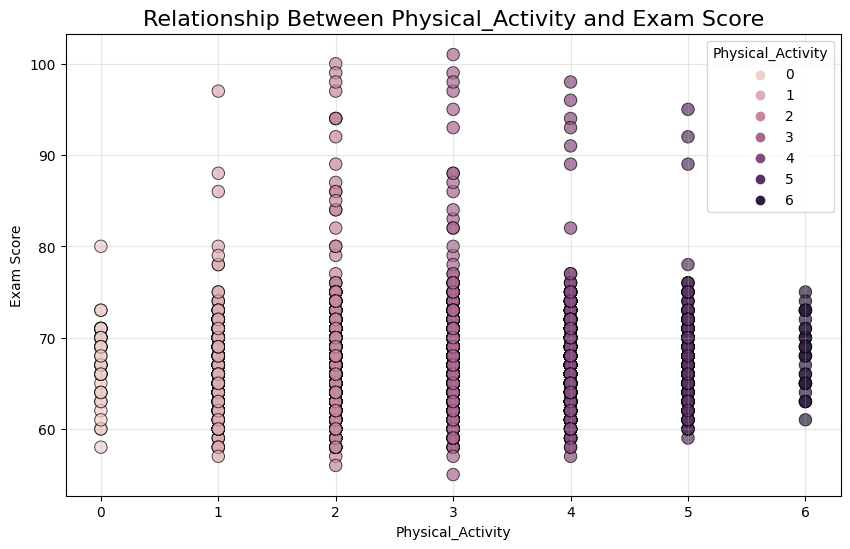

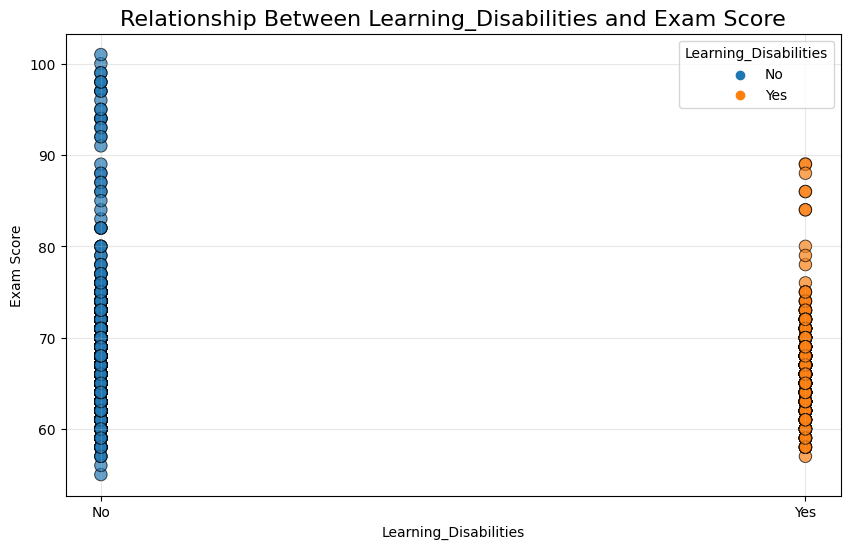

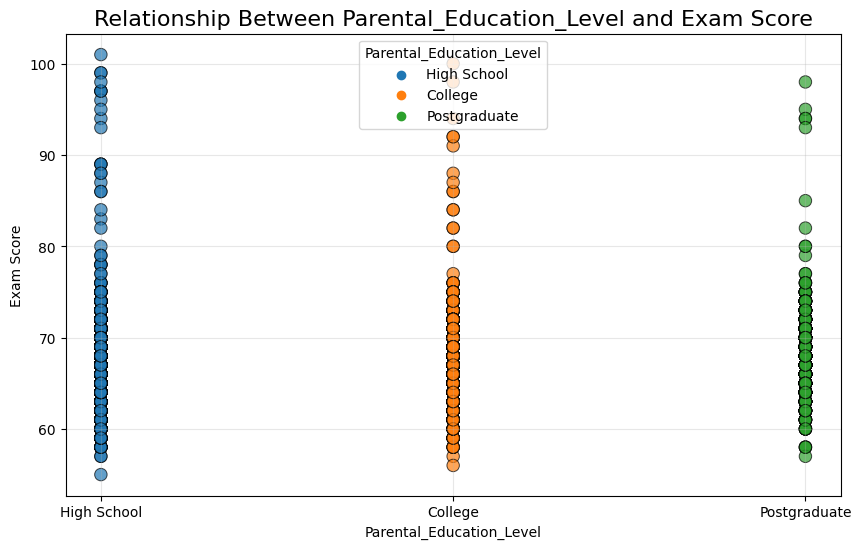

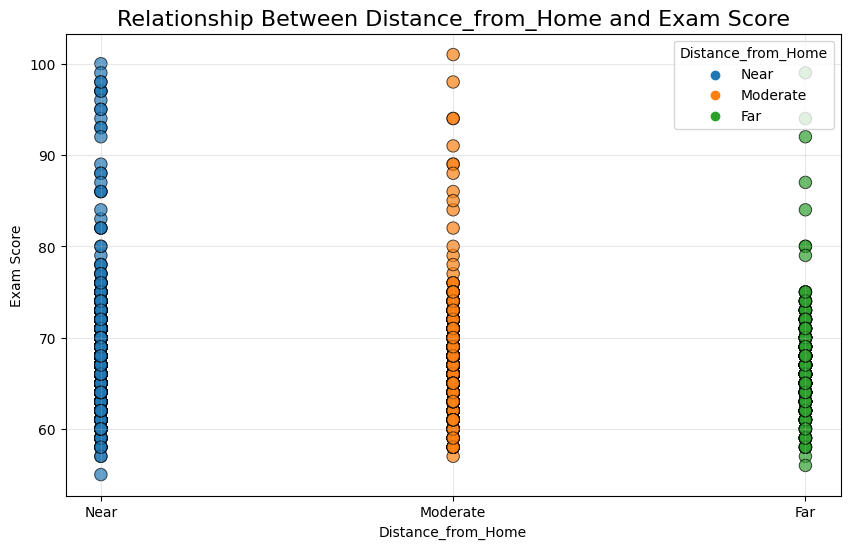

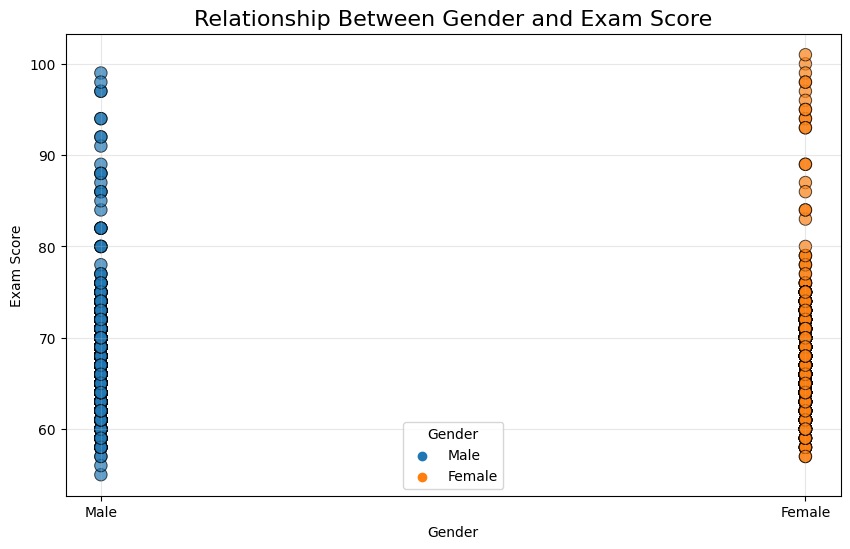

In [10]:
# lets understand the scatter distribution for each categoriscal columns
for col in df.drop(columns = "Exam_Score") :
    
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        x=col,
        y="Exam_Score",
        data=df,
        color="red",
        s=80,              # point size
        edgecolor="black",
        alpha=0.7,          # transparency
        hue = col
    )
    plt.title(f"Relationship Between {col} and Exam Score", fontsize=16)
    plt.xlabel(col)
    plt.ylabel("Exam Score")
    plt.grid(alpha=0.3)
    plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


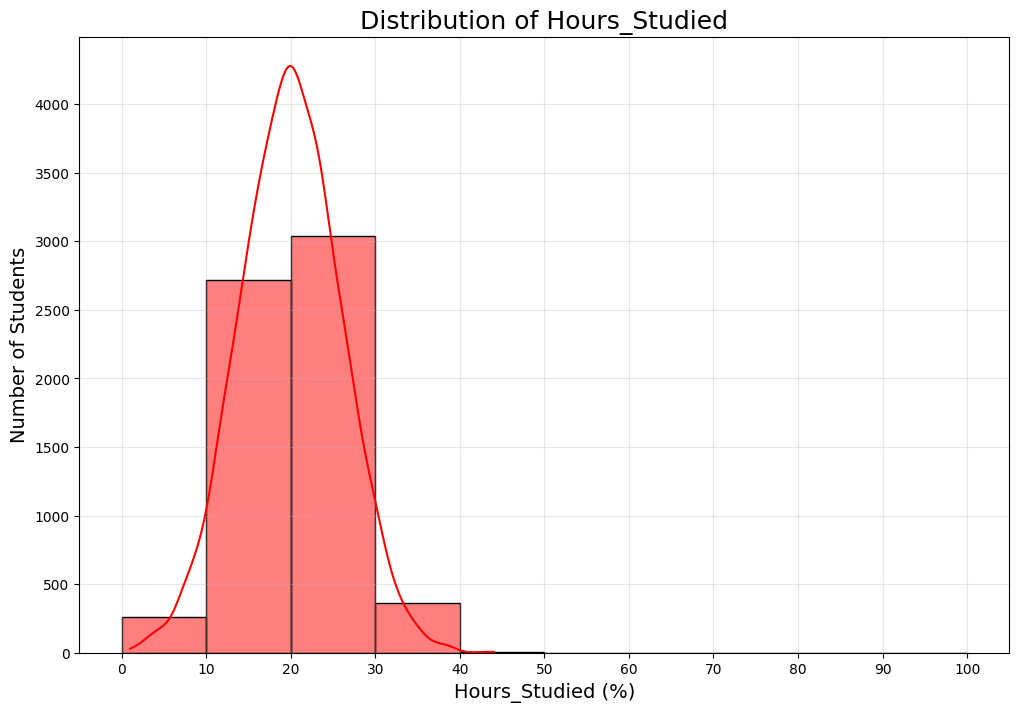

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


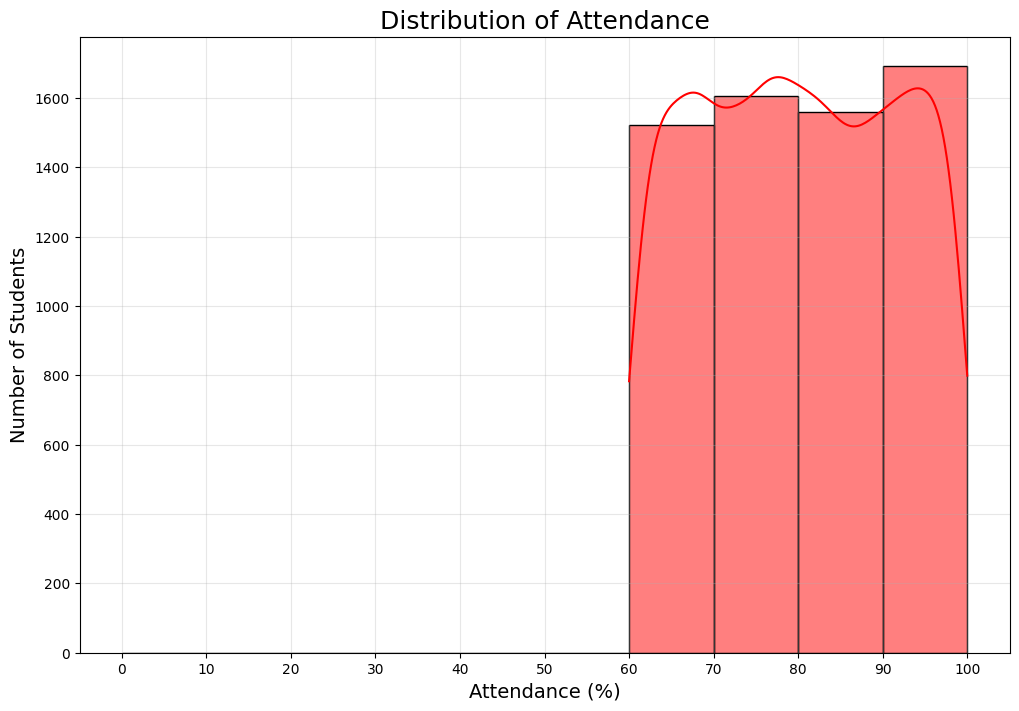

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


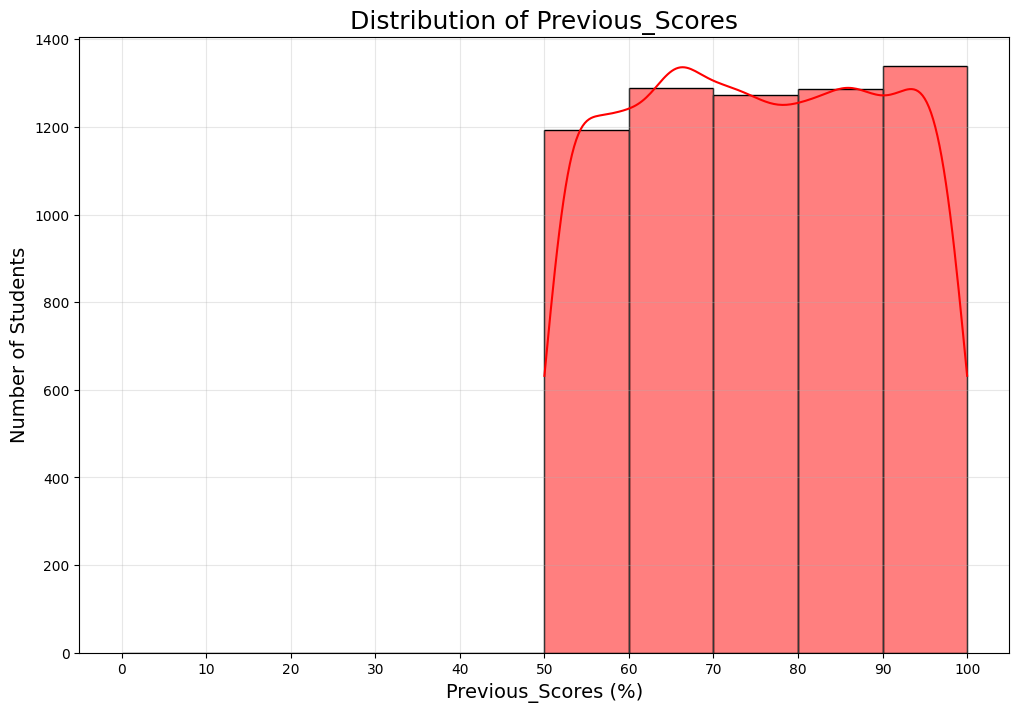

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


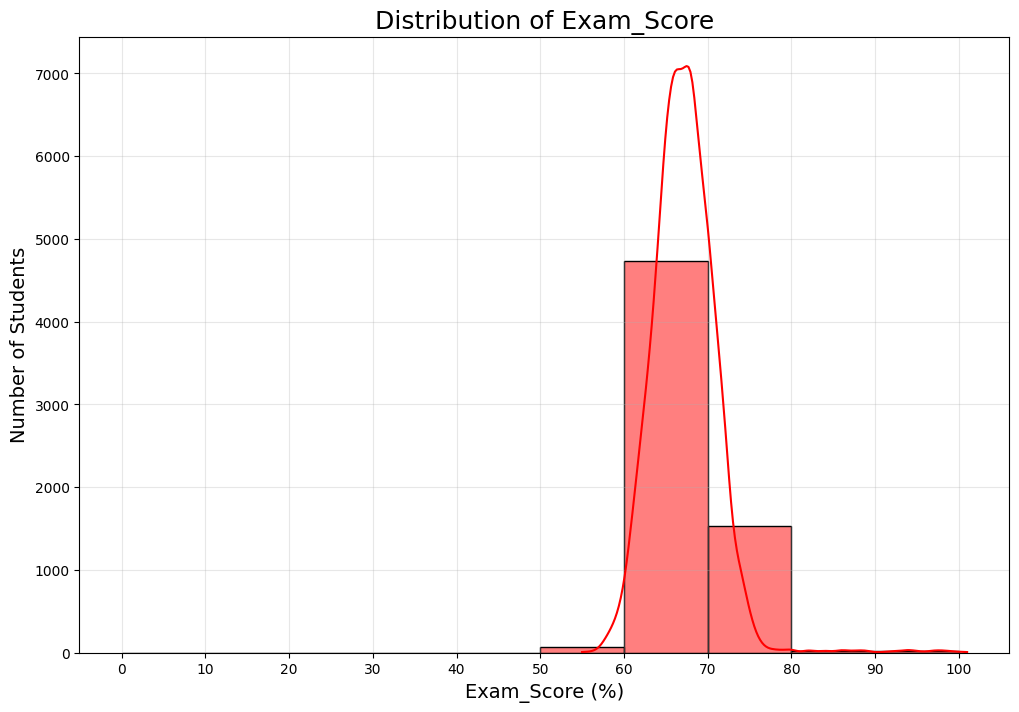

In [11]:
# lets understand the distributiuon of numerical columns
for col in num:
    plt.figure(figsize=(12,8))
    sns.histplot(x=col, data=df, kde=True, color="red", edgecolor="black", bins=np.linspace(0,100,11))
    plt.title(f"Distribution of {col}", fontsize=18)
    plt.xlabel(f"{col} (%)", fontsize=14)
    plt.ylabel("Number of Students", fontsize=14)
    plt.xticks(np.linspace(0,100,11))
    plt.grid(alpha=0.3)
    plt.show()
    


feature eng 

In [12]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## Feature Eng for linearmodels

In [13]:
# lets do label encoding for [Extracurricular_Activities,Internet_Access,Peer_Influence,Learning_Disabilities,Gender]
# lets do oridinal encoding for [Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Parental_Education_Level,Distance_from_Home]

label = ["Extracurricular_Activities","Internet_Access","Peer_Influence","Learning_Disabilities","Gender"]
dff = df.copy()


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in label:
    dff[col] = le.fit_transform(dff[col])


encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
encod = ["Parental_Involvement","Access_to_Resources","Motivation_Level","Family_Income","Teacher_Quality"]

for col in  encod:
    dff[col] = encoder.fit_transform(dff[[col]])


encoderschool = OrdinalEncoder(categories = [["Public","Private"]])
dff["School_Type"] = encoderschool.fit_transform(dff[["School_Type"]])


encoderparental = OrdinalEncoder(categories = [["High School","College","Postgraduate"]])
dff["Parental_Education_Level"] = encoderparental.fit_transform(dff[["Parental_Education_Level"]])

encoderdistance = OrdinalEncoder(categories = [["Near","Moderate","Far"]])
dff["Distance_from_Home"] = encoderdistance.fit_transform(dff[["Distance_from_Home"]])

dff



,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0.0,2.0,0,7,73,0.0,1,0,0.0,1.0,0.0,2,3,0,0.0,0.0,1,67
1,19,64,0.0,1.0,0,8,59,0.0,1,2,1.0,1.0,0.0,0,4,0,1.0,1.0,0,61
2,24,98,1.0,1.0,1,7,91,1.0,1,2,1.0,1.0,0.0,1,4,0,2.0,0.0,1,74
3,29,89,0.0,1.0,1,8,98,1.0,1,1,1.0,1.0,0.0,0,4,0,0.0,1.0,1,71
4,19,92,1.0,1.0,1,6,65,1.0,1,3,1.0,2.0,0.0,1,4,0,1.0,0.0,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2.0,1.0,0,7,76,1.0,1,1,2.0,1.0,0.0,2,2,0,0.0,0.0,0,68
6603,23,76,2.0,1.0,0,8,81,1.0,1,3,0.0,2.0,0.0,2,2,0,0.0,0.0,0,69
6604,20,90,1.0,0.0,1,6,65,0.0,1,3,0.0,1.0,0.0,0,2,0,2.0,0.0,0,68
6605,10,86,2.0,2.0,1,6,91,2.0,1,2,0.0,1.0,1.0,2,3,0,0.0,2.0,0,68


## Feature Importance

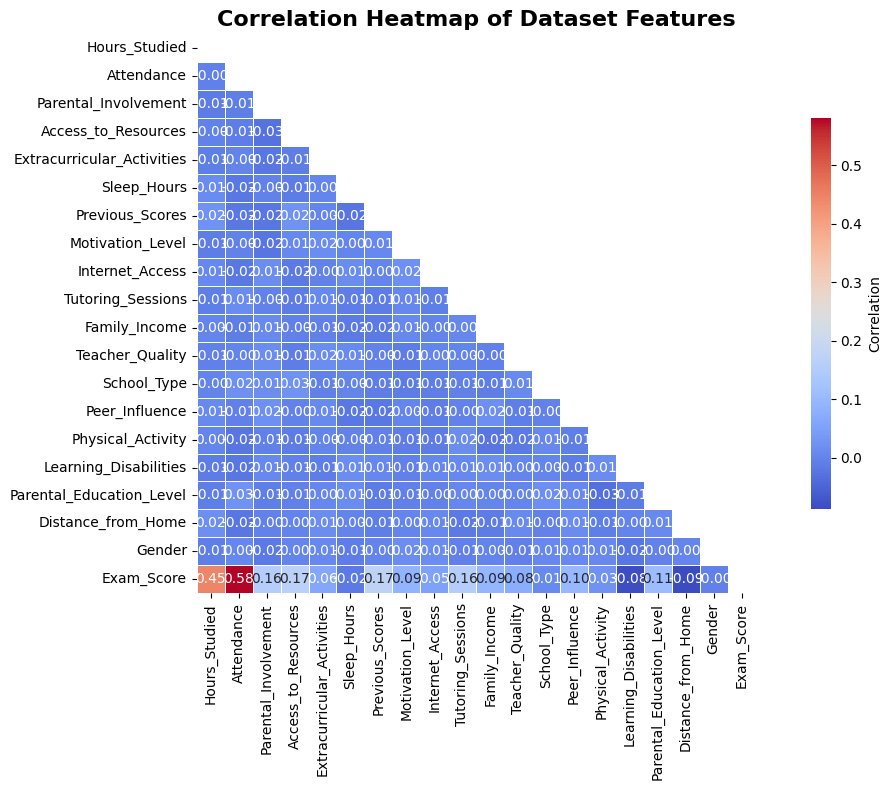

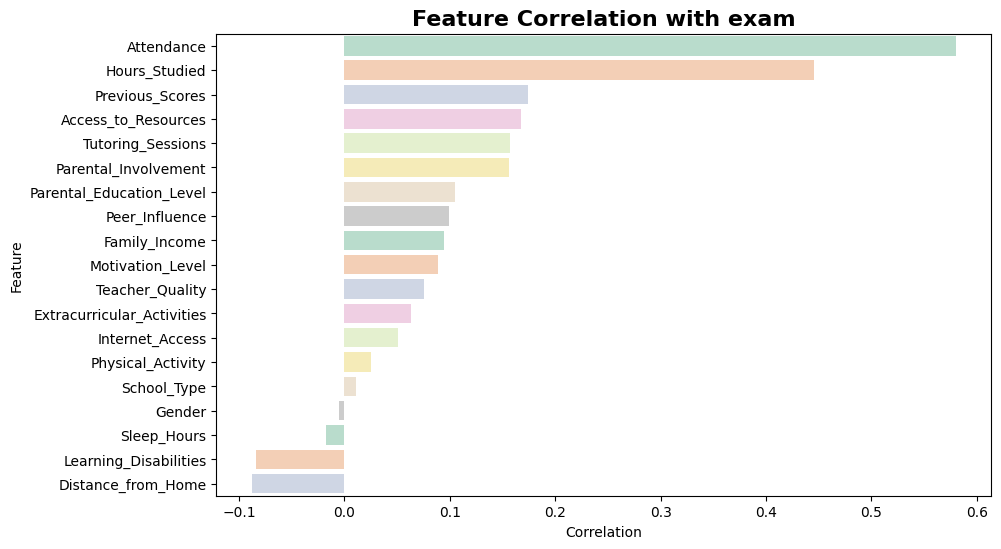

In [14]:
# Compute correlation matrix
corr = dff.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a mask for the upper triangle (optional, for better readability)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with seaborn
sns.heatmap(
    corr, 
    mask=mask, 
    annot=True,          # Show correlation values
    fmt=".2f",          # Format to 2 decimal places
    cmap="coolwarm",    # Color map
    linewidths=0.5,     # Lines between cells
    cbar_kws={"shrink": 0.7, "label": "Correlation"},  # Color bar options
    square=True
)

# Title
plt.title("Correlation Heatmap of Dataset Features", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

feature = corr["Exam_Score"].sort_values(ascending = False)[1:]
feature_df = feature.reset_index()
feature_df.columns = ["Feature", "Correlation"]

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Correlation", y="Feature", data=feature_df, palette="Pastel2")
plt.title("Feature Correlation with exam", fontsize=16, fontweight='bold')
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

## Modelling

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(dff.drop(columns = "Exam_Score"),dff["Exam_Score"],test_size = 0.2)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrainscaled = scaler.fit_transform(xtrain)
xtestscaled = scaler.transform(xtest)


In [17]:
# importing models

from sklearn.linear_model import LinearRegression       # Ordinary Least Squares
from sklearn.linear_model import Ridge                  # L2 regularized
from sklearn.linear_model import Lasso                  # L1 regularized
from sklearn.linear_model import ElasticNet             # L1 + L2 regularization
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
lr = LinearRegression()
l1 = Ridge()
l2 = Lasso()
l = ElasticNet()
forest = RandomForestRegressor()
boost = GradientBoostingRegressor()
adboost = AdaBoostRegressor()
tre =DecisionTreeRegressor()
models = [lr,l1,l2,l]
treemodels = [forest,boost,adboost,tre]

In [18]:
from sklearn.metrics import r2_score
result = {}
for i in models:
    # fit our model
    i.fit(xtrainscaled,ytrain)
    print(f"{i} succesfully trained")

    # r2 score
    r2 = r2_score(ytest,i.predict(xtestscaled))
    print(f"r2 score for {i }",r2)

    result[i] = r2*100
    print("\n====================\n")

LinearRegression() succesfully trained
r2 score for LinearRegression() 0.6383653979975148


Ridge() succesfully trained
r2 score for Ridge() 0.6383600106493086


Lasso() succesfully trained
r2 score for Lasso() 0.3588170065678937


ElasticNet() succesfully trained
r2 score for ElasticNet() 0.3859604222640558




In [19]:
dftree = df.copy()
column = []
for col in df.select_dtypes(include = "O"):
    column.append(col)
df_encoded = pd.get_dummies(df, columns=column,dtype = int)
df_encoded
    

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,7,73,0,3,67,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,19,64,8,59,2,4,61,0,1,0,...,1,0,1,0,0,0,1,0,1,0
2,24,98,7,91,2,4,74,0,0,1,...,1,0,0,0,1,0,0,1,0,1
3,29,89,8,98,1,4,71,0,1,0,...,1,0,0,1,0,0,1,0,0,1
4,19,92,6,65,3,4,70,0,0,1,...,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68,1,0,0,...,1,0,0,1,0,0,0,1,1,0
6603,23,76,8,81,3,2,69,1,0,0,...,1,0,0,1,0,0,0,1,1,0
6604,20,90,6,65,3,2,68,0,0,1,...,1,0,0,0,1,0,0,1,1,0
6605,10,86,6,91,2,3,68,1,0,0,...,1,0,0,1,0,1,0,0,1,0


In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df_encoded.drop(columns = "Exam_Score"),df_encoded["Exam_Score"],test_size = 0.2)

In [21]:
from sklearn.metrics import r2_score
result = {}
for i in treemodels:
    # fit our model
    i.fit(xtrain,ytrain)
    print(f"{i} succesfully trained")

    # r2 score
    r2 = r2_score(ytest,i.predict(xtest))
    print(f"r2 score for {i }",r2)

    result[i] = r2*100
    print("\n====================\n")

RandomForestRegressor() succesfully trained
r2 score for RandomForestRegressor() 0.6587236467154733


GradientBoostingRegressor() succesfully trained
r2 score for GradientBoostingRegressor() 0.7016864497106469


AdaBoostRegressor() succesfully trained
r2 score for AdaBoostRegressor() 0.0023108853688846853


DecisionTreeRegressor() succesfully trained
r2 score for DecisionTreeRegressor() 0.35012791887549966




# 📝 Final Conclusion and Further Work

## ✅ Final Conclusion

- Among **tree-based models**, **Gradient Boosting Regressor** performed the best with an **R² score of 0.80**, indicating it can explain ~80% of the variance in student exam scores.  
- **Random Forest Regressor** also performed well with **R² = 0.72**.  
- **AdaBoost Regressor** and **Decision Tree Regressor** underperformed, with R² scores of **-0.39** and **0.09**, respectively.  
- For **linear models**, **Linear Regression** and **Ridge Regression** performed similarly well with **R² ≈ 0.76**, while **Lasso** and **ElasticNet** lagged behind.  
- Overall, **ensemble methods** (especially Gradient Boosting) are better suited for this dataset due to their ability to capture non-linear relationships between student features and exam scores.  

---

## 🔧 Hyperparameter Tuning (Further Work)

- **Random Forest Regressor:** Tune `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`.  
- **Gradient Boosting Regressor:** Tune `n_estimators`, `learning_rate`, `max_depth`, `subsample`, `min_samples_split`, `min_samples_leaf`, `max_features`.  
- **AdaBoost Regressor:** Tune `n_estimators`, `learning_rate`, `loss`, and `base_estimator` (e.g., shallow decision trees).  
- **Linear Models:** Tune `alpha` for Ridge, Lasso, and ElasticNet; try **cross-validation** for best regularization strength.  

---

## 🚀 Further Work

- Apply **GridSearchCV** or **RandomizedSearchCV** for **systematic hyperparameter tuning** to improve model performance.  
- Investigate **feature importance** from tree-based models to identify the most influential factors affecting exam scores.  
- Explore **polynomial or interaction features** for linear models to capture non-linear relationships.  
- Consider **stacking or blending ensemble models** for further performance improvement.  
- Check for **outliers or skewed distributions** in features like `Hours_Studied` or `Previous_Scores` and apply transformations if necessary.  
- Evaluate models using **cross-validation** to ensure stability and avoid overfitting.  
